In [1]:
import pandas as pd
import numpy as np
import cv2
import os
import matplotlib.pyplot as plt
import random
import pickle
from collections import Counter
from sklearn.preprocessing import MinMaxScaler

In [3]:
train_dir='/content/Train'                                         
classes=['Eyes Open','Eyes Closed']

In [4]:
training_data=[]                             #function to create a list having images of shape 224x224x3 and a label(0/1)

def create_train_data():
	for c in classes:
		path_train=os.path.join(train_dir,c)  
		img_class=classes.index(c)           
		for img in os.listdir(path_train):   #iterating through each image in path
			try:
				images=cv2.imread(os.path.join(path_train,img))      #reading all the images
				resized_image=cv2.resize(images,(224,224))           #resizing them to 224x224x3 for MobileNet
				training_data.append([resized_image,img_class])      #appending images and their class to the list
				print(f'{img}')                         

			except Exception as e:
				print('missed')
				pass


In [5]:
create_train_data()
random.shuffle(training_data)

Streaming output truncated to the last 5000 lines.
s0012_02244_0_1_0_2_0_01.png
s0019_02539_0_0_0_0_1_01.png
s0019_01187_0_0_0_0_0_01.png
s0013_00029_0_0_0_0_0_01.png
s0019_00985_0_0_0_0_0_01.png
s0013_01258_0_0_0_0_0_01.png
s0019_02309_0_0_0_0_0_01.png
s0012_01506_0_0_0_0_1_01.png
s0033_00094_0_0_0_0_1_01.png
s0012_01861_0_1_0_0_0_01.png
s0034_00095_0_0_0_0_0_02.png
s0012_01988_0_1_0_2_0_01.png
s0036_00059_1_0_0_0_0_01.png
s0036_00211_1_0_0_0_1_01.png
s0019_02283_0_0_0_0_1_01.png
s0012_02160_0_1_0_0_0_01.png
s0019_01494_0_0_0_0_0_01.png
s0021_00041_0_0_0_0_0_01.png
s0019_00934_0_0_0_0_0_01.png
s0019_02405_0_0_0_0_0_01.png
s0019_02852_0_0_0_0_0_01.png
s0019_02815_0_0_0_0_1_01.png
s0019_01793_0_0_0_0_0_01.png
s0019_02749_0_0_0_0_0_01.png
s0013_00815_0_0_0_0_0_01.png
s0012_01264_0_0_0_2_1_03.png
s0019_01090_0_0_0_0_1_01.png
s0012_04478_0_1_0_0_0_01.png
s0012_04409_0_1_0_0_0_01.png
s0012_04422_0_1_0_0_0_01.png
s0036_00060_1_0_0_0_1_01.png
s0012_04437_0_1_0_2_0_01.png
s0034_00049_0_0_0_0_0

In [ ]:
X=[]                                                            #separating images and their labels from training_data list
y=[]

for img,cat in training_data:                                   
	X.append(img)
	y.append(cat) 

X=np.array(X,dtype=np.uint8)                                    #converting images and labels into ndarray for faster execution
y=np.array(y)
X=X/255.0														#normalization

In [ ]:
X.shape

In [15]:
y.shape

(12000,)

In [3]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

In [9]:
model=tf.keras.applications.mobilenet.MobileNet()                                #initilaizing MobileNet 

In [10]:
model.summary()

Model: "mobilenet_1.00_224"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
conv1 (Conv2D)               (None, 112, 112, 32)      864       
_________________________________________________________________
conv1_bn (BatchNormalization (None, 112, 112, 32)      128       
_________________________________________________________________
conv1_relu (ReLU)            (None, 112, 112, 32)      0         
_________________________________________________________________
conv_dw_1 (DepthwiseConv2D)  (None, 112, 112, 32)      288       
_________________________________________________________________
conv_dw_1_bn (BatchNormaliza (None, 112, 112, 32)      128       
_________________________________________________________________
conv_dw_1_relu (ReLU)        (None, 112, 112, 32

In [11]:
model_input=model.layers[0].input                                    
model_output=model.layers[-4].output                                             #removing last 3 layers of MobileNet as they have lot of params

In [12]:
flat_layer=layers.Flatten()(model_output)                                       #flatten layer after convolution operation
final_output=layers.Dense(1)(flat_layer)                                        #dense/fully connected layer for deep learning
final_output=layers.Activation('sigmoid')(final_output)                         #activation layer for output

In [14]:
my_model=keras.Model(inputs=model_input,outputs=final_output)                  #initilization of our Transfer Learning model

In [15]:
my_model.summary()

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
conv1 (Conv2D)               (None, 112, 112, 32)      864       
_________________________________________________________________
conv1_bn (BatchNormalization (None, 112, 112, 32)      128       
_________________________________________________________________
conv1_relu (ReLU)            (None, 112, 112, 32)      0         
_________________________________________________________________
conv_dw_1 (DepthwiseConv2D)  (None, 112, 112, 32)      288       
_________________________________________________________________
conv_dw_1_bn (BatchNormaliza (None, 112, 112, 32)      128       
_________________________________________________________________
conv_dw_1_relu (ReLU)        (None, 112, 112, 32)      0   

In [16]:
my_model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])          #compilation

In [17]:
final_model=my_model.fit(X,y,epochs=10,validation_split=0.2)                              #fitting model having 20% validation data for 10 epochs

Epoch 1/10
300/300 [==============================] - 56s 157ms/step - loss: 0.1106 - accuracy: 0.9620 - val_loss: 0.1653 - val_accuracy: 0.9379
Epoch 2/10
300/300 [==============================] - 45s 150ms/step - loss: 0.0208 - accuracy: 0.9943 - val_loss: 0.1267 - val_accuracy: 0.9579
Epoch 3/10
300/300 [==============================] - 45s 150ms/step - loss: 0.0152 - accuracy: 0.9955 - val_loss: 0.0194 - val_accuracy: 0.9950
Epoch 4/10
300/300 [==============================] - 45s 150ms/step - loss: 0.0109 - accuracy: 0.9967 - val_loss: 0.0255 - val_accuracy: 0.9917
Epoch 5/10
300/300 [==============================] - 45s 150ms/step - loss: 0.0092 - accuracy: 0.9975 - val_loss: 0.0138 - val_accuracy: 0.9954
Epoch 6/10
300/300 [==============================] - 45s 149ms/step - loss: 0.0038 - accuracy: 0.9984 - val_loss: 0.0318 - val_accuracy: 0.9912
Epoch 7/10
300/300 [==============================] - 45s 148ms/step - loss: 0.0098 - accuracy: 0.9969 - val_loss: 0.0259 - val_ac

In [22]:
print(final_model.history.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


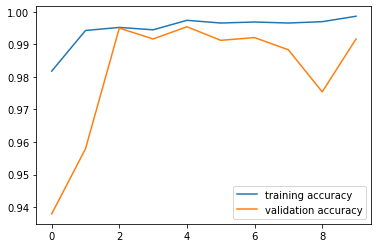

In [30]:
plt.plot(final_model.history['accuracy'],label='training accuracy')                         #valiation accuracy is almost as good as training acc
plt.plot(final_model.history['val_accuracy'],label='validation accuracy')
plt.legend()
plt.show()

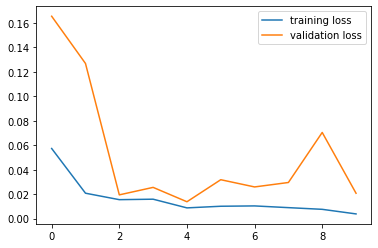

In [31]:
plt.plot(final_model.history['loss'],label='training loss')                         #validation loss is almost same as training loss
plt.plot(final_model.history['val_loss'],label='validation loss')
plt.legend()
plt.show()

In [18]:
my_model.save('my_model.h5')                                                     #saving the model for further use

In [4]:
model = keras.models.load_model('my_model.h5')                                   #loading model from the disc

In [5]:
test_dir='/content/Test'                                     
classes=['Eyes Open','Eyes Closed']

In [6]:
testing_data=[]

def create_test_data():
	for c in classes:
		path_test=os.path.join(test_dir,c)
		img_class=classes.index(c)
		for img in os.listdir(path_test):
			try:
				images=cv2.imread(os.path.join(path_test,img))
				resized_image=cv2.resize(images,(224,224))
				testing_data.append([resized_image,img_class])
				print(f'{img}')

			except Exception as e:
				print('missed')
				pass

In [7]:
create_test_data()
random.shuffle(testing_data)

s0012_04682_0_0_1_0_0_03.png
s0012_04769_0_0_1_0_0_03.png
s0012_04719_0_0_1_0_0_03.png
s0012_04853_0_0_1_0_1_03.png
s0012_08324_0_0_1_1_0_02.png
s0012_08150_0_0_1_1_0_02.png
s0012_08223_0_0_1_1_0_02.png
s0012_04827_0_0_1_0_0_03.png
s0012_08603_0_0_1_1_0_02.png
s0012_08534_0_0_1_1_0_02.png
s0012_08134_0_0_1_1_0_02.png
s0012_08488_0_0_1_1_0_02.png
s0012_08116_0_0_1_1_0_02.png
s0012_04623_0_0_1_0_1_03.png
s0012_04794_0_0_1_0_0_03.png
s0012_08029_0_0_1_1_0_02.png
s0012_04811_0_0_1_0_0_03.png
s0012_08075_0_0_1_1_0_02.png
s0012_08587_0_0_1_1_0_02.png
s0012_08112_0_0_1_1_0_02.png
s0012_08115_0_0_1_1_0_02.png
s0012_04894_0_0_1_0_1_03.png
s0012_08293_0_0_1_1_0_02.png
s0012_04896_0_0_1_0_1_03.png
s0012_08109_0_0_1_1_0_02.png
s0012_08347_0_0_1_1_0_02.png
s0012_08351_0_0_1_1_0_02.png
s0012_07925_0_0_1_1_0_02.png
s0012_08133_0_0_1_1_0_02.png
s0012_08284_0_0_1_0_0_02.png
s0012_08560_0_0_1_1_0_02.png
s0012_08025_0_0_1_1_0_02.png
s0012_08360_0_0_1_1_0_02.png
s0012_08607_0_0_1_1_0_02.png
s0012_08207_0_

In [8]:
X=[]
y=[]

for img,cat in testing_data:
	X.append(img)
	y.append(cat) 

X=np.array(X,dtype=np.uint8)
y=np.array(y)
X=X/255.0

In [9]:
X.shape

(2024, 224, 224, 3)

In [10]:
y.shape

(2024,)

In [34]:
print(y[1])                                                            #this is the label of the 2nd image from test data

1


In [35]:
model.predict(X[[1]])                                                  #this is the model prediction of the same image.. both are 1

array([[0.99999905]], dtype=float32)

In [31]:
print((X[[1]]).shape)

(1, 224, 224, 3)


In [11]:
y_pred=model.predict(X)                                            #prediction on images of test dataset

In [17]:
from sklearn.metrics import confusion_matrix,accuracy_score

In [16]:
print(confusion_matrix(y,y_pred.round()))             #confusion matrix has a very high TP and TN..which means the model's classification is good

[[999  13]
 [ 72 940]]


In [18]:
print(accuracy_score(y,y_pred.round()))                #as this is a completely balanced dataset, we can rely upon accuracy scores only.
                                                       #accuracy of almost 96%

0.9580039525691699
